In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/covid_19_india .csv")

In [3]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [4]:
df.shape

(18110, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
df.isna().sum()

,0
Sno,0
Date,0
Time,0
State/UnionTerritory,0
ConfirmedIndianNational,0
ConfirmedForeignNational,0
Cured,0
Deaths,0
Confirmed,0


How did the number of confirmed, recovered, and deceased cases evolve at the national level?


In [11]:
df['Active'] = df['Confirmed'] - (df['Cured'] + df['Deaths'])

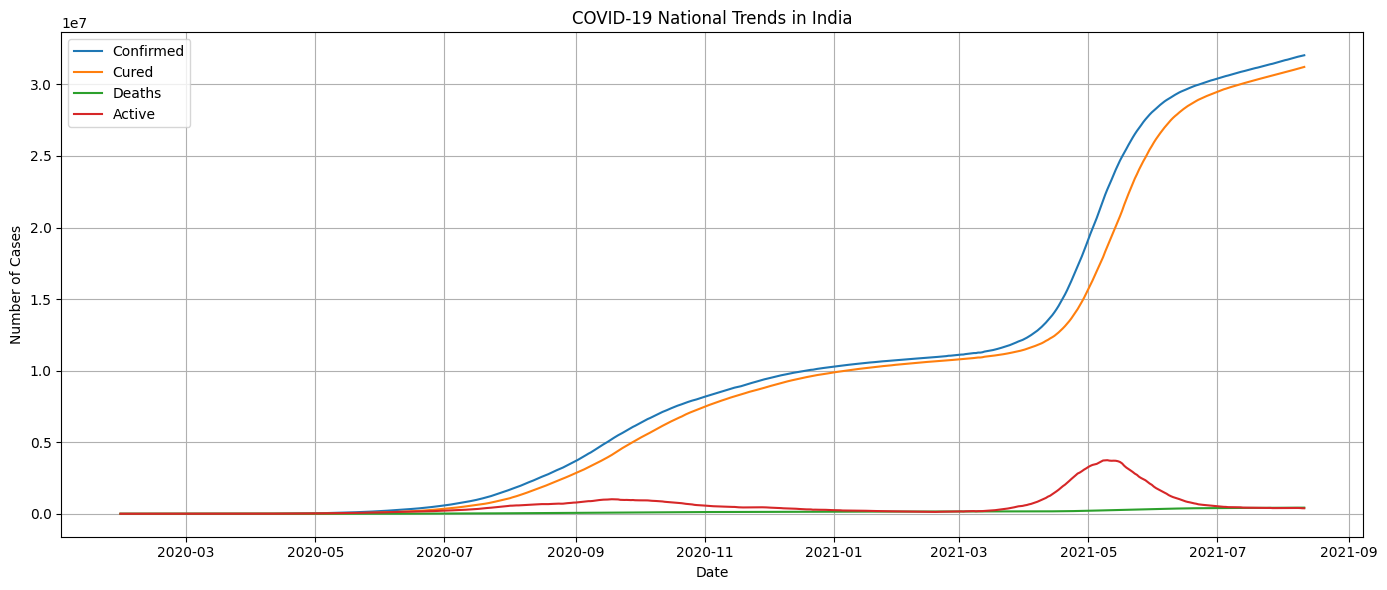

In [12]:
national = df.groupby('Date')[['Confirmed', 'Cured', 'Deaths', 'Active']].sum()

# Plot
plt.figure(figsize=(14, 6))
for col in national.columns:
    plt.plot(national.index, national[col], label=col)

plt.title('COVID-19 National Trends in India')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Which states or union territories reported the highest and lowest COVID-19 cases and fatalities?


In [13]:
latest = df[df['Date'] == df['Date'].max()]

# Top & Bottom States by Confirmed Cases
print("Top 5 by Confirmed:")
print(latest.sort_values('Confirmed', ascending=False)[['State/UnionTerritory', 'Confirmed']].head())

print("\nBottom 5 by Confirmed:")
print(latest.sort_values('Confirmed')[['State/UnionTerritory', 'Confirmed']].head())

# Top & Bottom by Deaths Cases
print("\nTop 5 by Deaths:")
print(latest.sort_values('Deaths', ascending=False)[['State/UnionTerritory', 'Deaths']].head())

print("\nBottom 5 by Deaths:")
print(latest.sort_values('Deaths')[['State/UnionTerritory', 'Deaths']].head())


Top 5 by Confirmed:
      State/UnionTerritory  Confirmed
18094          Maharashtra    6363442
18090               Kerala    3586693
18089            Karnataka    2921049
18104           Tamil Nadu    2579130
18075       Andhra Pradesh    1985182

Bottom 5 by Confirmed:
                           State/UnionTerritory  Confirmed
18074               Andaman and Nicobar Islands       7548
18092                               Lakshadweep      10263
18081  Dadra and Nagar Haveli and Daman and Diu      10654
18091                                    Ladakh      20411
18103                                    Sikkim      28018

Top 5 by Deaths:
      State/UnionTerritory  Deaths
18094          Maharashtra  134201
18089            Karnataka   36848
18104           Tamil Nadu   34367
18082                Delhi   25068
18108        Uttar Pradesh   22775

Bottom 5 by Deaths:
                           State/UnionTerritory  Deaths
18081  Dadra and Nagar Haveli and Daman and Diu       4
18092        

What is the recovery and fatality rate across different states?


/tmp/ipython-input-22-2169274286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['RecoveryRate'] = (latest['Cured'] / latest['Confirmed']) * 100
/tmp/ipython-input-22-2169274286.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest['FatalityRate'] = (latest['Deaths'] / latest['Confirmed']) * 100


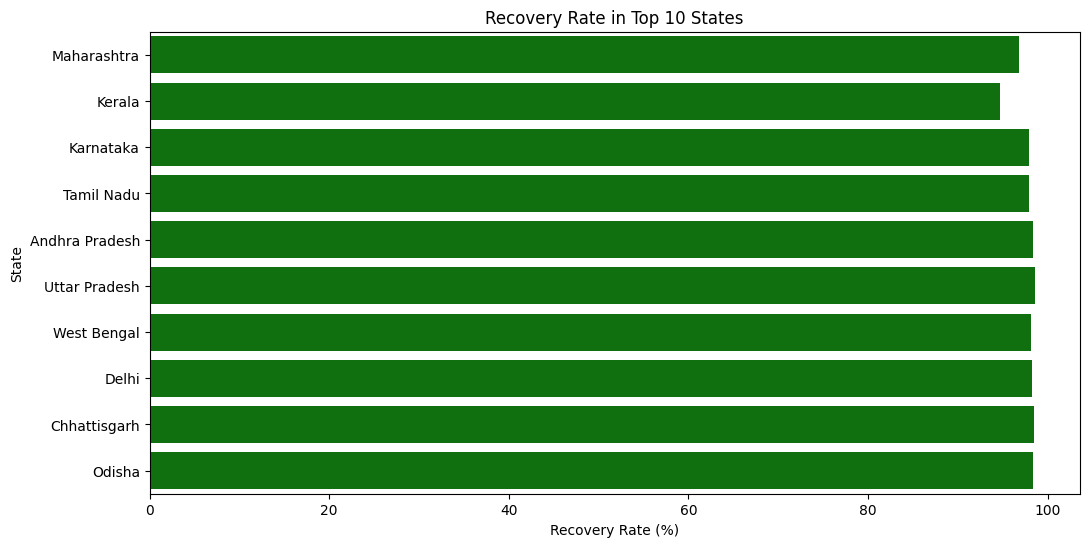

In [22]:
latest['RecoveryRate'] = (latest['Cured'] / latest['Confirmed']) * 100
latest['FatalityRate'] = (latest['Deaths'] / latest['Confirmed']) * 100

# Plot bar chart
plt.figure(figsize=(12, 6))
top_states = latest.sort_values('Confirmed', ascending=False).head(10)

# Recovery
sns.barplot(x='RecoveryRate', y='State/UnionTerritory', data=top_states, color='green')
plt.title("Recovery Rate in Top 10 States")
plt.xlabel("Recovery Rate (%)")
plt.ylabel("State")
plt.show()

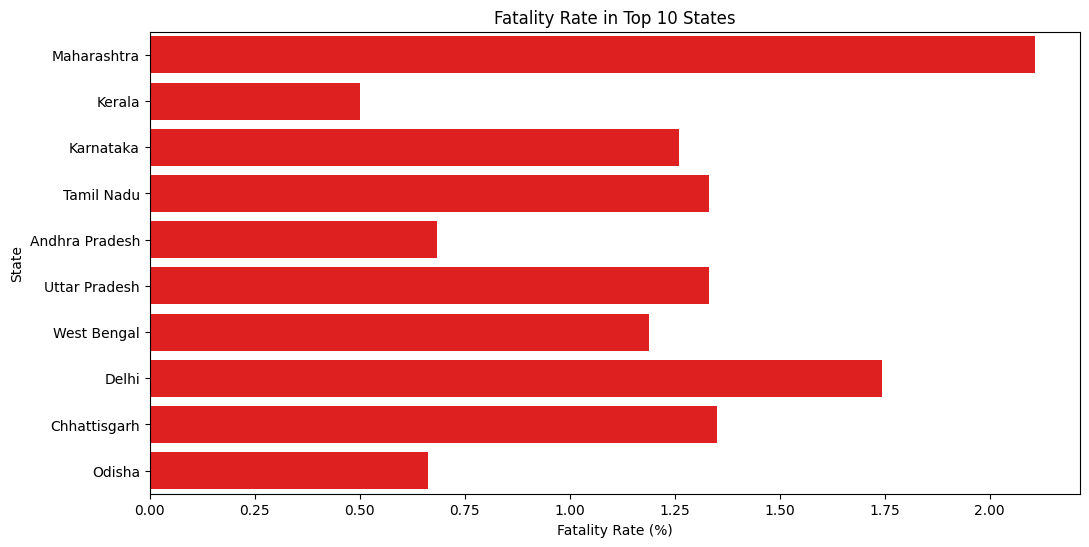

In [16]:
# Fatality
plt.figure(figsize=(12, 6))
sns.barplot(x='FatalityRate', y='State/UnionTerritory', data=top_states, color='red')
plt.title("Fatality Rate in Top 10 States")
plt.xlabel("Fatality Rate (%)")
plt.ylabel("State")
plt.show()

Are there any outliers or inconsistencies in the daily reported numbers?


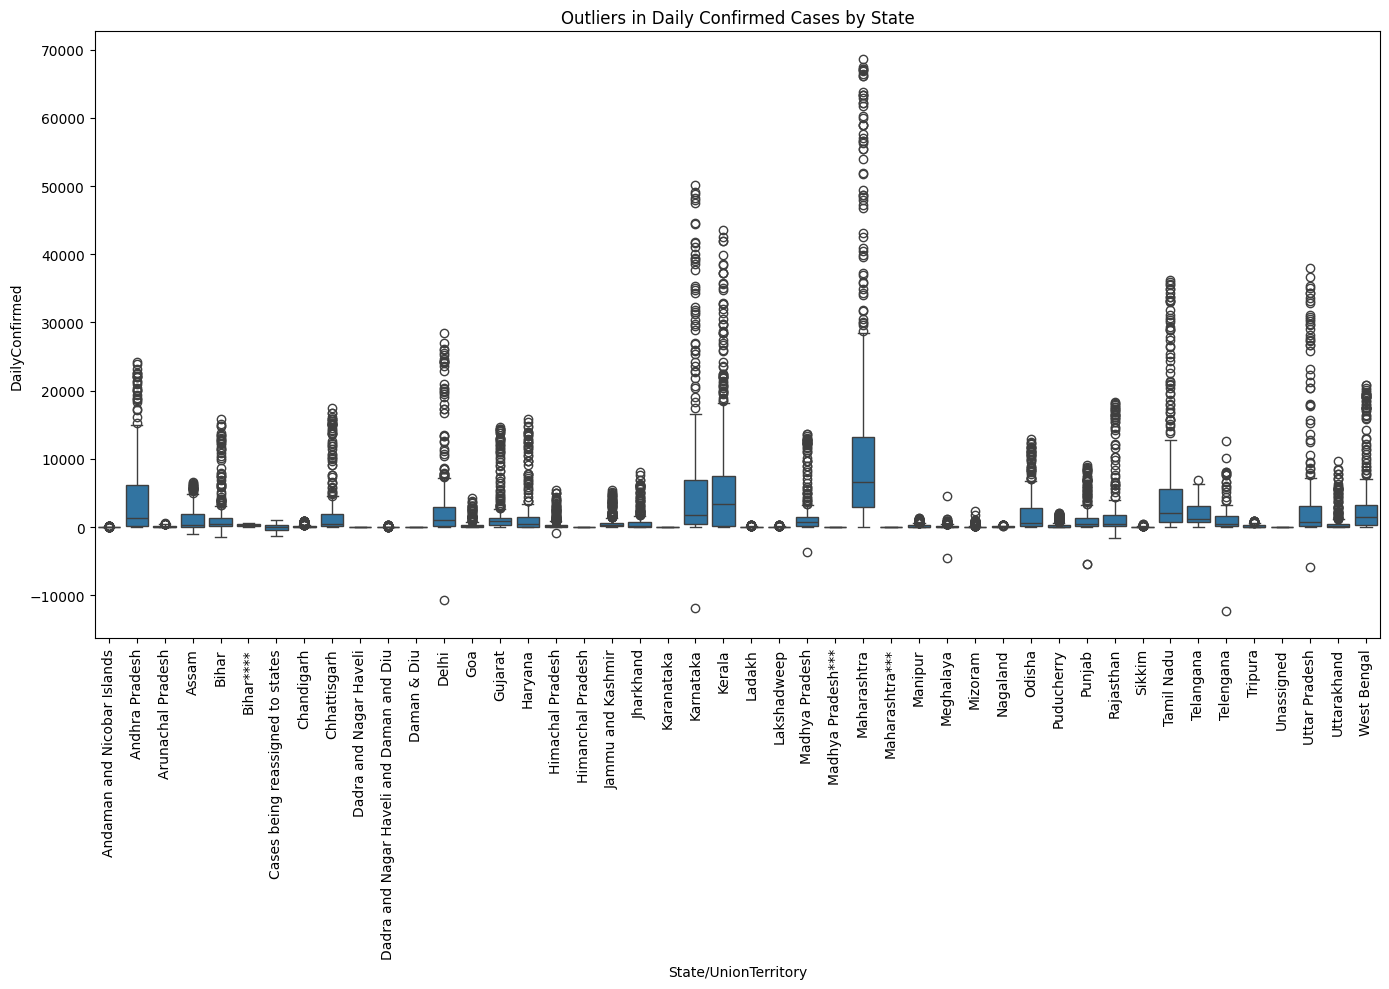

In [19]:
# Calculate daily new confirmed cases
df_sorted = df.sort_values(['State/UnionTerritory', 'Date'])
df_sorted['DailyConfirmed'] = df_sorted.groupby('State/UnionTerritory')['Confirmed'].diff().fillna(0)

# Plot outliers using boxplot
plt.figure(figsize=(14, 10))
sns.boxplot(x='State/UnionTerritory', y='DailyConfirmed', data=df_sorted)
plt.xticks(rotation=90)
plt.title("Outliers in Daily Confirmed Cases by State")
plt.tight_layout()
plt.show()

What is the correlation between active cases and recovery/death rates over time?

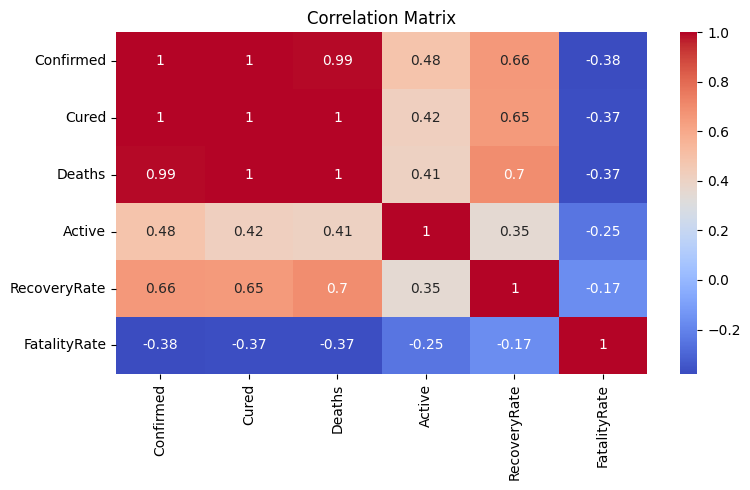

In [20]:
# Daily national stats
daily_stats = df.groupby('Date')[['Confirmed', 'Cured', 'Deaths', 'Active']].sum()

# Compute rates
daily_stats['RecoveryRate'] = (daily_stats['Cured'] / daily_stats['Confirmed']) * 100
daily_stats['FatalityRate'] = (daily_stats['Deaths'] / daily_stats['Confirmed']) * 100

# Correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(daily_stats.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

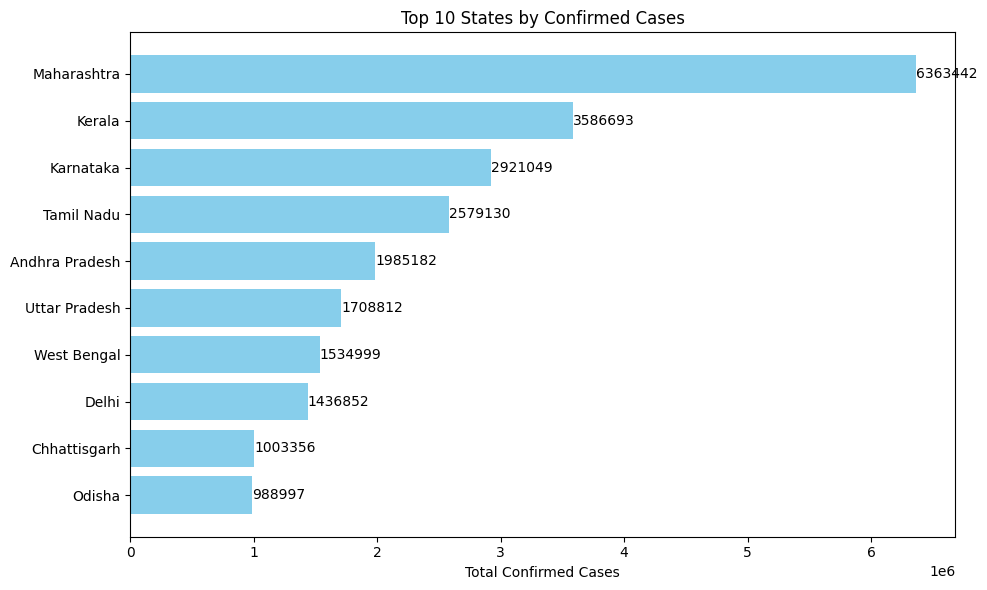

In [24]:
latest = df[df['Date'] == df['Date'].max()]
top_states = latest.groupby('State/UnionTerritory')['Confirmed'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_states.index[::-1], top_states.values[::-1], color='skyblue')
plt.xlabel("Total Confirmed Cases")
plt.title("Top 10 States by Confirmed Cases")
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{int(bar.get_width())}', va='center')
plt.tight_layout()
plt.show()

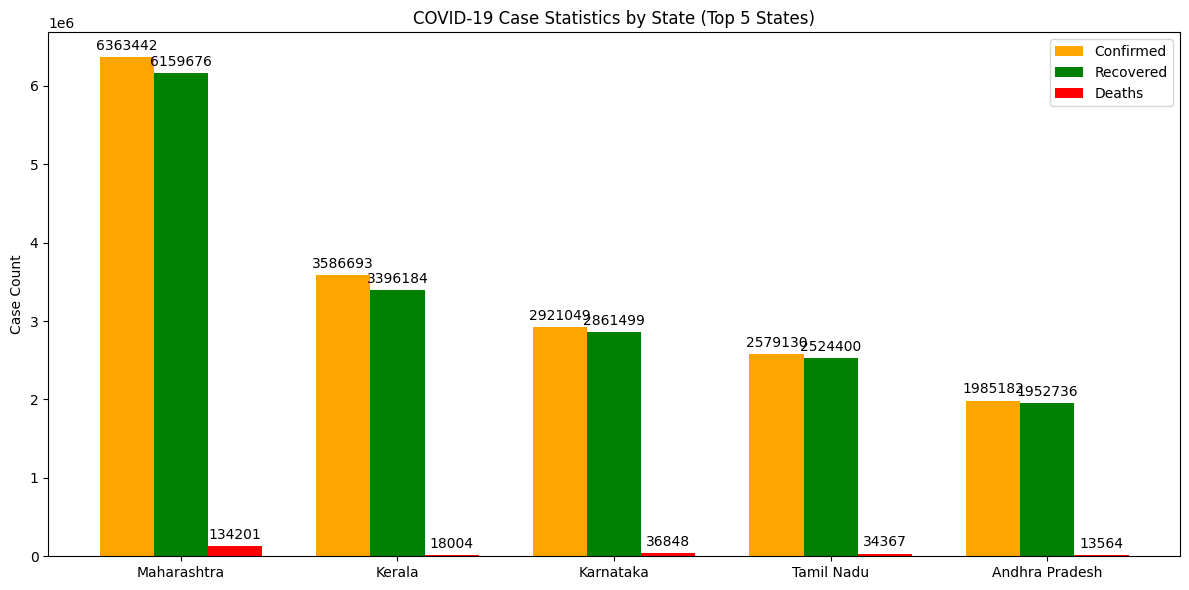

In [27]:
# Get the top 5 states by confirmed cases
top_5_states = latest.sort_values('Confirmed', ascending=False).head(5)

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

bar_width = 0.25
index = np.arange(len(top_5_states))

rects1 = ax.bar(index, top_5_states['Confirmed'], bar_width, label='Confirmed', color='orange')
rects2 = ax.bar(index + bar_width, top_5_states['Cured'], bar_width, label='Recovered', color='green')
rects3 = ax.bar(index + 2 * bar_width, top_5_states['Deaths'], bar_width, label='Deaths', color='red')

# Labels and titles
ax.set_ylabel('Case Count')
ax.set_title('COVID-19 Case Statistics by State (Top 5 States)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(top_5_states['State/UnionTerritory'])
ax.legend()

# Add numbers on top of bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.tight_layout()
plt.show()